In [1]:
import mne
import numpy as np
%matplotlib inline  

path = mne.datasets.eegbci.load_data(1, 1)
path[0]

u'/home/pat/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf'

In [2]:
raw = mne.io.read_raw_edf(path[0], preload=True)

Extracting edf Parameters from /home/pat/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
Setting channel info structure...
Creating Raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Ready.


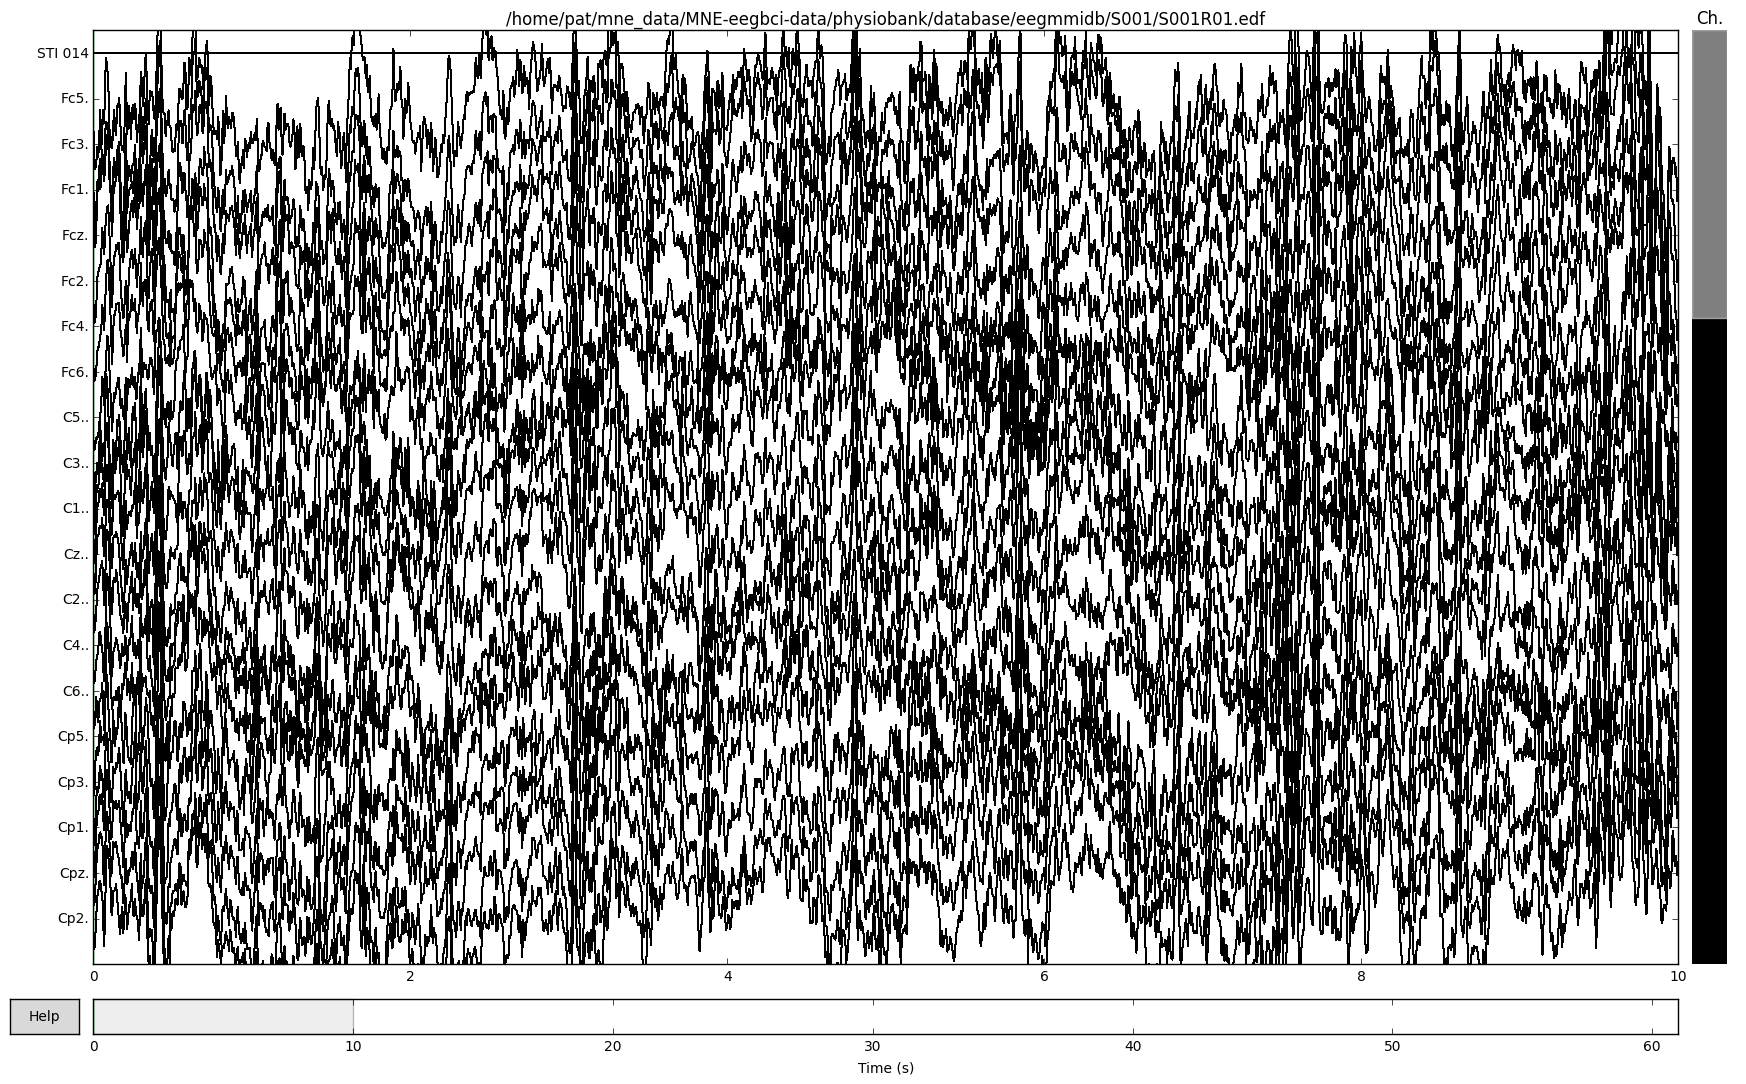

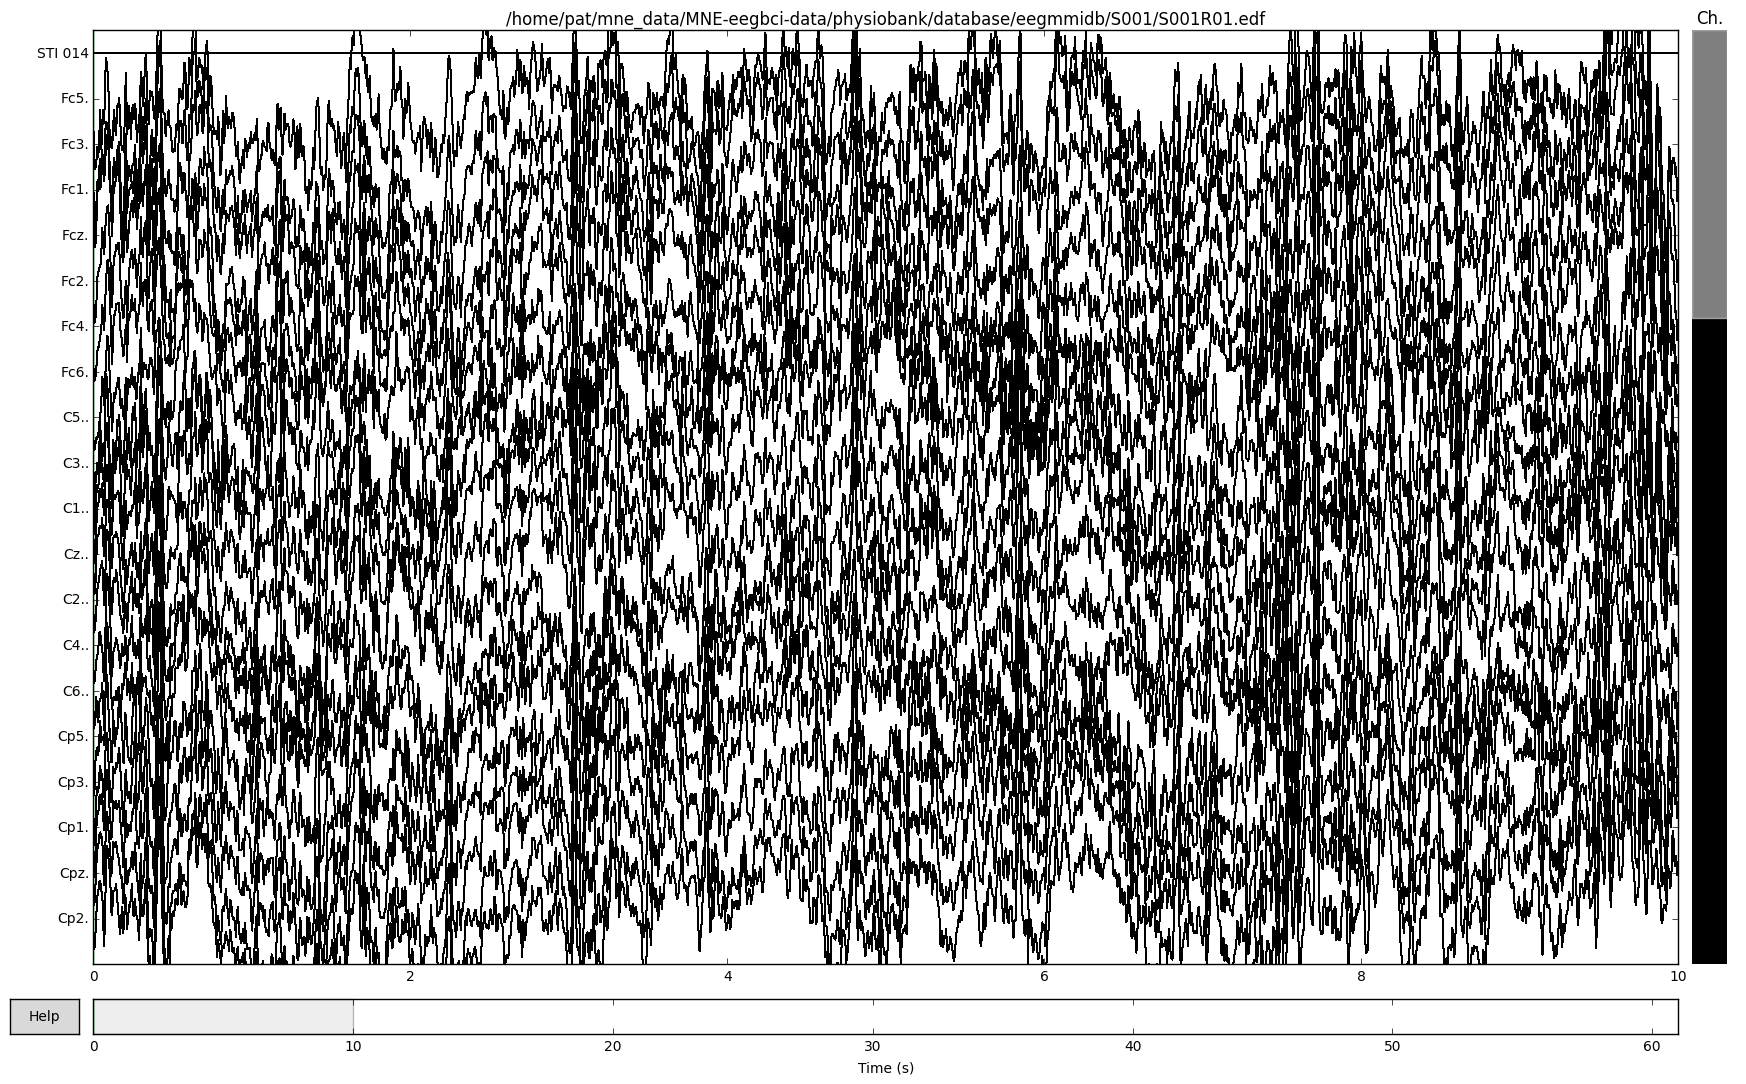

In [3]:
raw.plot()

In [4]:
ch_names = ['A', 'B'] # channel names
sfreq = 200 # sampling frequency, in hertz
info = mne.create_info(ch_names, sfreq) # See docs for full list of Info options.
samples = np.array([[-1, 0, -1, 1, 1], [0, 1, 0, -1, 0]]) # Samples for each channel
loadedRaw = mne.io.RawArray(samples, info)

Creating RawArray with float64 data, n_channels=2, n_times=5
    Range : 0 ... 4 =      0.000 ...     0.020 secs
Ready.


In [5]:
raw.ch_names[:8]

[u'Fc5.', u'Fc3.', u'Fc1.', u'Fcz.', u'Fc2.', u'Fc4.', u'Fc6.', u'C5..']

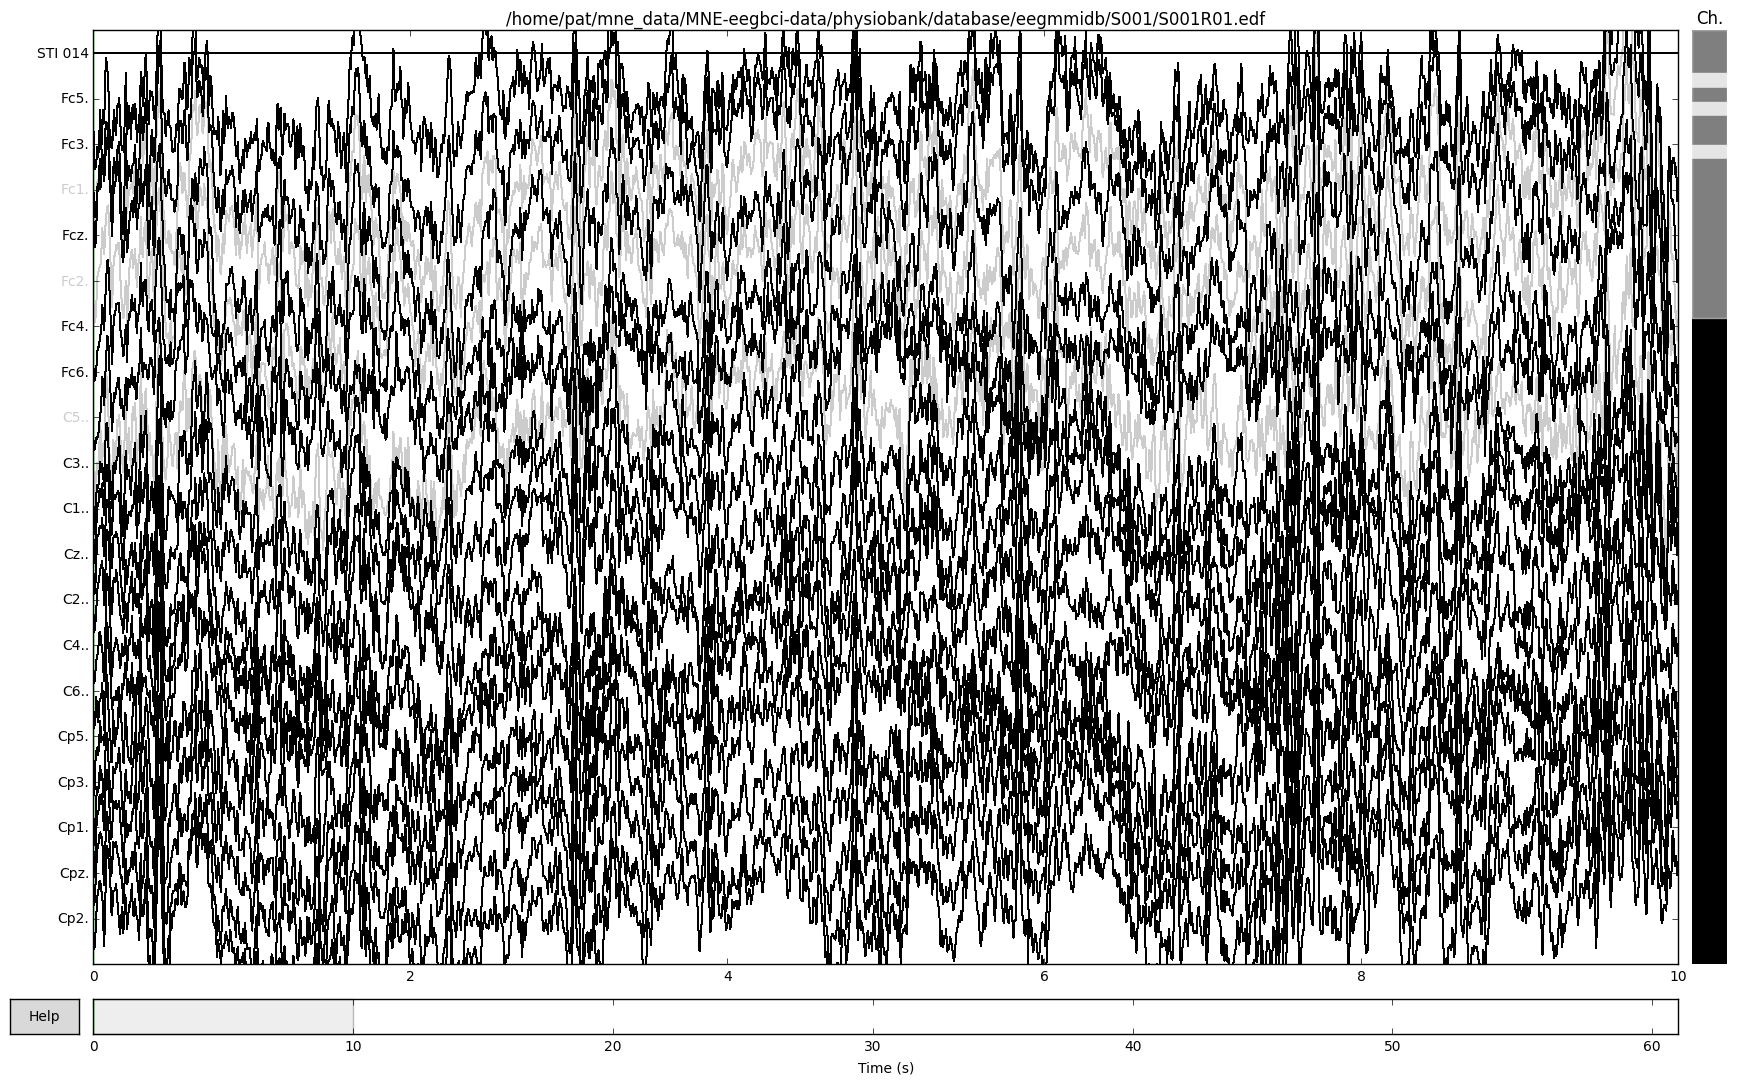

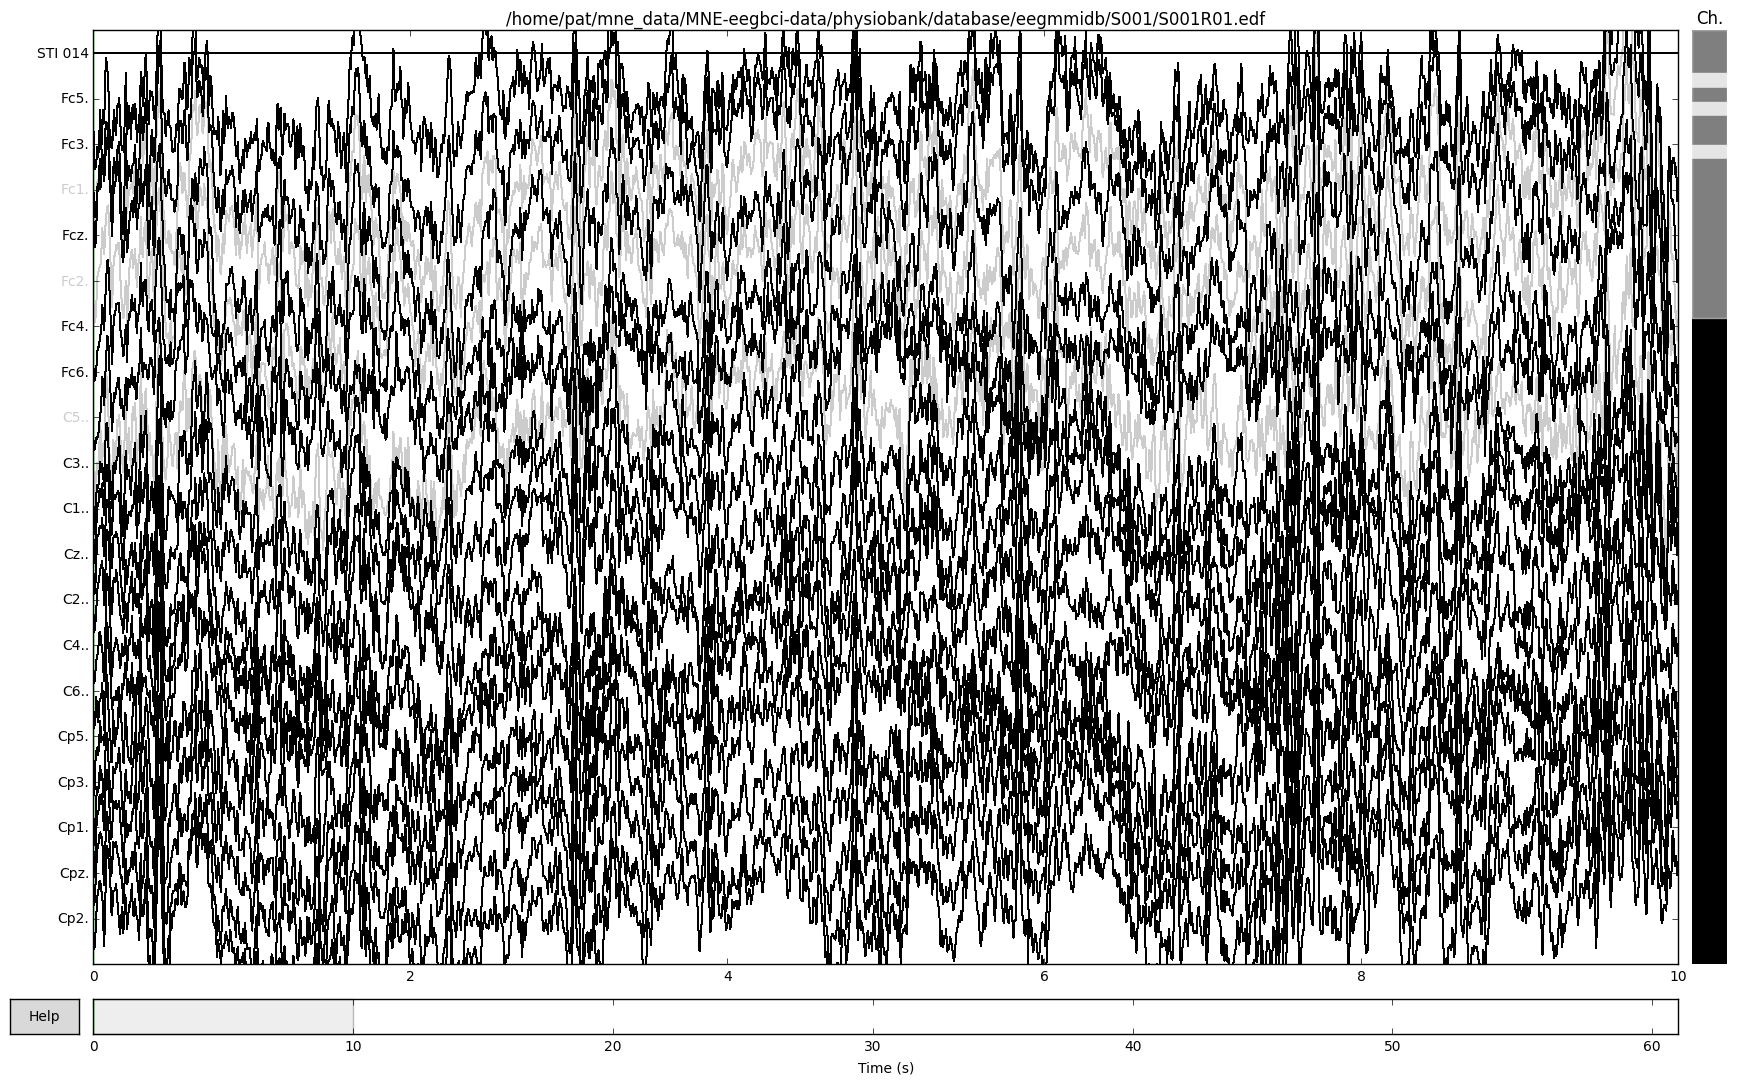

In [6]:
raw.info['bads'] += ['Fc1.', 'Fc2.', 'C5..']
picks = mne.pick_types(raw.info, exclude='bads')
raw.plot()

Effective window size : 12.800 (s)


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


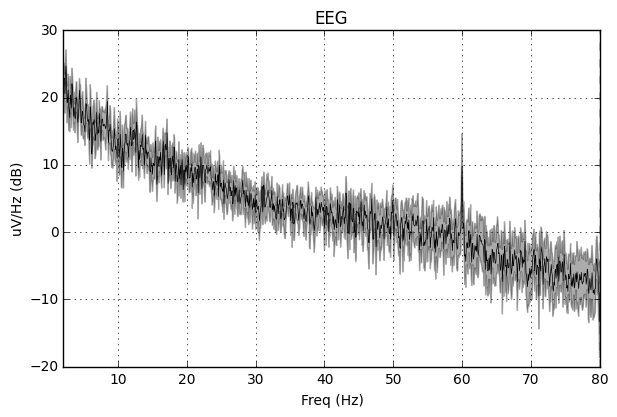

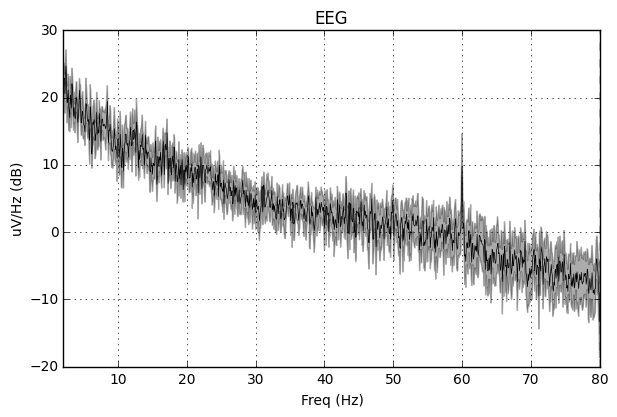

In [7]:
raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=80, average=True, spatial_colors=False)

Setting up band-stop filter from 59 - 61 Hz
Filter length of 2112 samples (13.200 sec) selected
Effective window size : 12.800 (s)


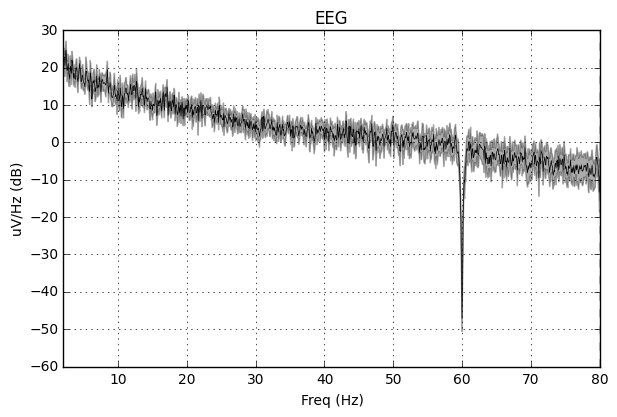

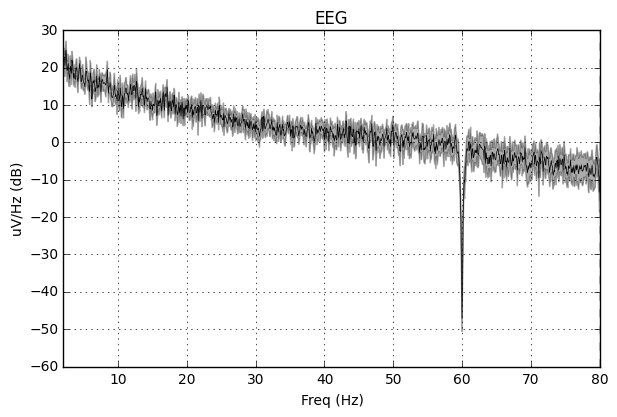

In [8]:
raw.notch_filter(60)
raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=80, average=True, spatial_colors=False)


Setting up band-pass filter from 7.5 - 12 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 3.1 Hz
Filter length of 528 samples (3.300 sec) selected
Effective window size : 12.800 (s)


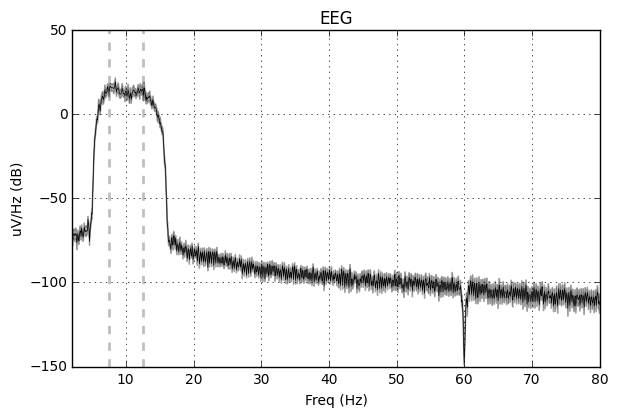

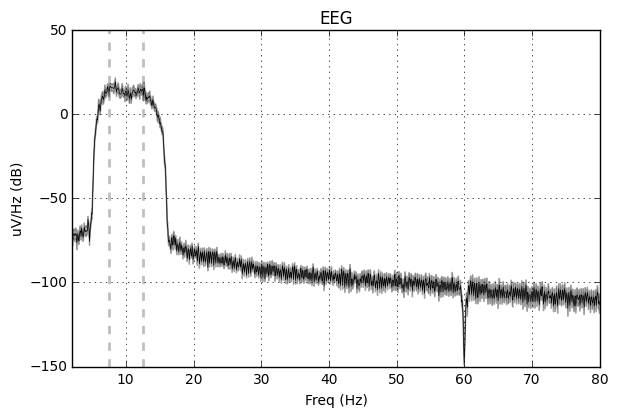

In [9]:
raw.filter(l_freq=7.5, h_freq=12.5)
raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=80, average=True, spatial_colors=False)

2407 events found
Events id: [1]
Resampling of the stim channels caused event information to become unreliable. Consider finding events on the original data and passing the event matrix as a parameter.
Effective window size : 25.600 (s)


<ipython-input-10-6ec1c55913dc>:2: RuntimeWarning: Resampling of the stim channels caused event information to become unreliable. Consider finding events on the original data and passing the event matrix as a parameter.
  raw.resample(80, npad='auto')


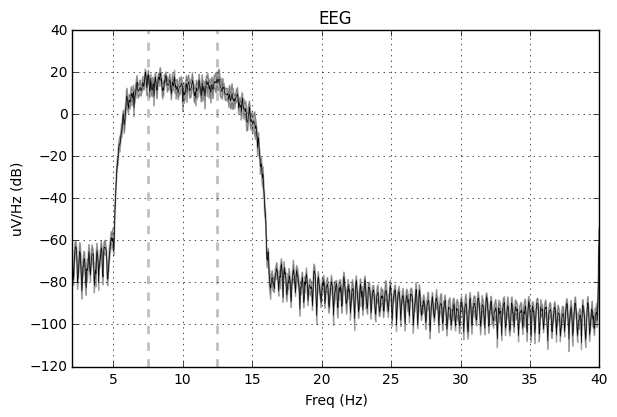

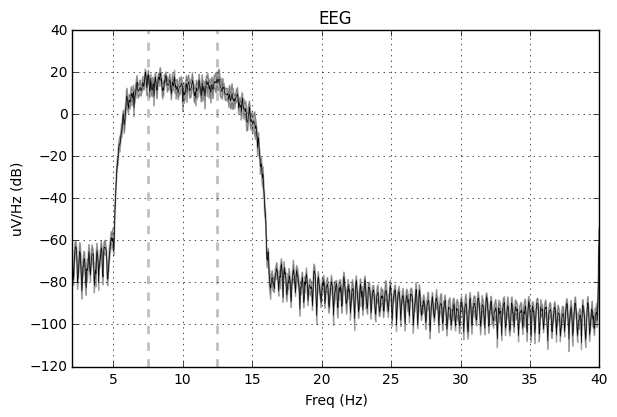

In [10]:
# Downsample a lot
raw.resample(80, npad='auto')
raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=80, average=True, spatial_colors=False)
# Notice that the max plotted frequency is 40, the nyquist rate!